Implementing K-Means Algorithm

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [20]:
np.random.seed(10)
x, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=123)
print(x.shape)

(500, 2)


In [21]:
k= len(np.unique(y))
print(k)

3


In [22]:
def eu_dist(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [23]:
#nearest centroid
def near_centroid(sample,centroids):
    dist=[eu_dist(sample,point) for point in centroids]
    near_indx=np.argmin(dist)
    return near_indx

In [24]:
#creating clusters  
def create_cluster(centroids):
    #assign samples to clusters
    clusters=[[] for i in range(k)]
    for idx,sample in enumerate(x):
        centroid_indx=near_centroid(sample,centroids)
        clusters[centroid_indx].append(idx)
    return clusters

In [44]:
#new centroids
def get_centroids(clusters,n_features):
    centroids=np.zeros((k,n_features))
    for idx,cluster in enumerate(clusters):
        mean=np.mean(x[cluster],axis=0)
        centroids[idx]=mean
    return centroids

In [46]:
#covergence
def converged(centroids_old,centroids):
    dist=[eu_dist(centroids_old[i],centroids[i]) for i in range(k)]
    return sum(dist)==0

In [55]:
#cluster labels
def cluster_labels(clusters,n_samples):
    labels=np.zeros(n_samples)
    for cluster_idx,cluster in enumerate(clusters):
        for sample in cluster:
            labels[sample]=cluster_idx
    return labels

In [68]:
def Kmeans(x,k,max_iters):
    
    n_samples,n_features=x.shape
    clusters=[[] for _ in range(k)]
    centroids=[]
    
    #randomly choosing centroids
    random_sampindx=np.random.choice(n_samples,k,replace=False)
    centroids=[x[i] for i in random_sampindx]

    for _ in range(max_iters):
        #assign clusters to samples
        clusters=create_cluster(centroids)

        #new centroids
        centroids_old=centroids
        centroids=get_centroids(clusters,n_features)

        if converged(centroids_old,centroids):
            break

    #return the samples with labelling
    return cluster_labels(clusters,n_samples),clusters,centroids
 

In [69]:
max_iters=100
y_pred,clusters,centroids=Kmeans(x,k,max_iters)
y_pred

array([2., 0., 0., 2., 0., 2., 0., 0., 1., 1., 1., 2., 0., 1., 1., 0., 0.,
       0., 2., 0., 0., 0., 1., 2., 0., 1., 1., 0., 2., 1., 0., 2., 2., 0.,
       0., 0., 2., 1., 2., 2., 1., 0., 1., 2., 0., 1., 1., 0., 2., 2., 1.,
       0., 0., 2., 1., 0., 1., 1., 2., 0., 1., 1., 0., 1., 0., 1., 0., 2.,
       1., 2., 0., 1., 0., 0., 0., 0., 0., 1., 0., 2., 2., 2., 1., 1., 2.,
       0., 2., 1., 1., 0., 0., 1., 2., 2., 2., 2., 2., 2., 1., 0., 2., 1.,
       1., 2., 0., 2., 0., 1., 0., 0., 0., 2., 2., 0., 0., 2., 1., 0., 0.,
       2., 2., 2., 0., 0., 0., 0., 0., 1., 1., 1., 0., 2., 0., 0., 1., 1.,
       0., 1., 1., 2., 1., 1., 0., 1., 2., 1., 2., 0., 1., 2., 0., 2., 0.,
       2., 1., 1., 1., 0., 2., 0., 0., 1., 2., 1., 1., 0., 2., 2., 0., 1.,
       1., 2., 0., 2., 2., 1., 2., 2., 2., 1., 0., 2., 0., 1., 0., 1., 2.,
       1., 2., 2., 2., 1., 2., 0., 0., 0., 2., 1., 2., 2., 0., 1., 0., 1.,
       0., 0., 2., 1., 1., 1., 1., 0., 0., 1., 0., 2., 2., 2., 0., 1., 0.,
       1., 0., 0., 1., 2.

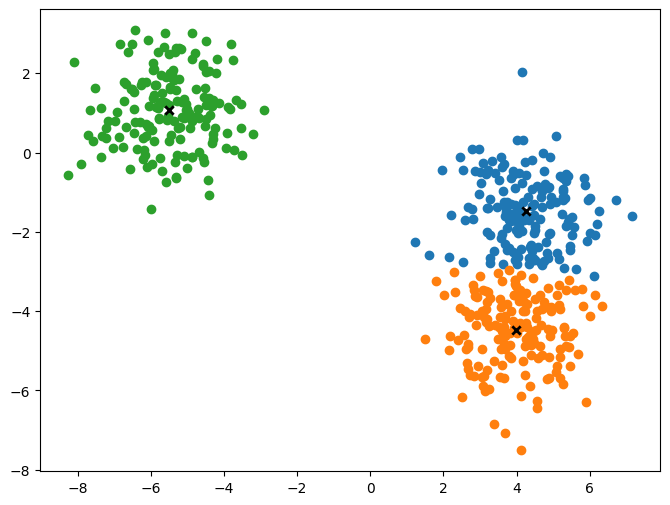

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, index in enumerate(clusters):
    point = x[index].T
    ax.scatter(*point, label=f"Cluster {i}")

for point in centroids:
    ax.scatter(*point, marker="x", color="black", linewidth=2)

plt.show()
        